Problem 1 - (a)

CNN 모델은 합성곱 계층(Convolution Layer), 풀링 계층(Pooling Layer), 완전 연결 계층(Fully Connected Layer)로 구분할 수 있다.
합성곱 계층에서는 일정한 사이즈로 입력 데이터를 지역적으로 구분한 후 디수의 필터와 곱연산을 통해 특성맵을 추출한다.
풀링 계층에서는 추출된 특성 맵을 지정한 풀링 사이즈로 구분하여 각 구역당 최대값(Max Pooling) 또는 평균값(Average Pooling) 하나만을 남기는 방식으로 특성 맵의 크기를 축소한다.
합성곱 계층과 풀링 계층을 반복하여 입력 데이터에 대한 특징을 추출한다.
완전 연결 층에서는 출력 클래스들과의 완전 연결 연산을 통한 예측 및 분류가 이루어진다.

Problem 1 - (b)

합성곱 층의 2가지 핵심 하이퍼 파라미터는 입력으로부터 필터를 적용할 패치의 크기(kernel size)와, 합성곱 연산에 사용할 필터의 수(filters)이다.
CNN의 학습 목적은 층마다 설정된 개수의 필터 가중치를 학습함으로써 클래스를 구별하는데 영향을 미치는 중요한 특징을 뽑아낼 수 있도록 하는 것이다. 필터의 크기를 크게 설정한다면 한 번에 넓은 구역에서 클래스를 구별하는 특징을 찾도록 하는 것이고, 작게 설정하면 작은 구역에서의 특징을 찾도록 하는 것이다. 따라서 모형에서 기대하는 바에 따라 필터를 적용할 패치의 크기를 다르게 설정할 수 있다. 또한 필터의 수를 다르게 설정함으로써, 특성 맵의 출력 깊이를 조절할 수 있다.

Problem 1 - (c)

이미지를 분석하기 위해서는, 각 픽셀의 값을 [0, 255] 사이의 숫자로 변환해야 한다. 그 후 행렬의 형태로 변환하면 이미지를 분석할 수 있는 데이터의 형태가 된다. 컬러 이미지의 경우에는 각 pixel의 값을 RGB(red, green, blue) 컬러를 이용하여 3가지 숫자로 나타낸다. 

Problem 1 -(d)

input size와 output size를 동일하게 하기 위해서는 패딩(padding)을 사용해야 한다. filter가 image를 지나가면서 stride에 따라 output size가 작아지기 때문에(dimension reduction), padding을 사용하면 이미지가 down scale되는 것을 막을 수 있다.

In [5]:
# Problem 2 - (a)

import sys
import tensorflow as tf
from tensorflow.keras import layers

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical, plot_model

import numpy as np
import matplotlib.pyplot as plt

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f'x_train : {x_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

x_train : (60000, 28, 28)
y_train : (60000,)
x_test : (10000, 28, 28)
y_test : (10000,)


In [9]:
# Problem 2 - (b)

img_rows = 28
img_cols = 28

input_shape = (img_rows, img_cols, 1)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1).astype("float32")
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1).astype("float32")

x_train /= 255.
x_test /= 255.

In [11]:
# Problem 2 - (c)

num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [15]:
# Problem 2 - (d)

# 모델 1
# 합성곱 필터 수와 크기: (32, 5x5) -> (64, 2x2)
# 활성화 함수: relu
# pooling 2번으로 크기 축소
# 배치사이즈 128, 에포크 10
model1 = Sequential([
    layers.Conv2D(32, kernel_size = (5, 5), strides = 1, activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Conv2D(64, kernel_size = (2, 2), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Flatten(),
    layers.Dense(num_classes, activation = 'softmax')
])

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist1 = model1.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose = 0,
                  validation_data=(x_test, y_test))

# 모델 2
# 모델 1에서 은닉층 수 증가
model2 = Sequential([
    layers.Conv2D(32, kernel_size = (5, 5), strides = 1, activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Conv2D(64, kernel_size = (2, 2), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Conv2D(128, kernel_size = (2, 2), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Flatten(),
    layers.Dense(num_classes, activation = 'softmax')
])

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist2 = model2.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose = 0,
                  validation_data=(x_test, y_test))

# 모델 3
# 모델 1에서 -> 배치사이즈 256, 에포크 10 으로 변경
# dropout 사용
model3 = Sequential([
    layers.Conv2D(32, kernel_size = (5, 5), strides = 1, activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Conv2D(64, kernel_size = (2, 2), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation = 'softmax')
])

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist3 = model3.fit(x_train, y_train, batch_size = 256, epochs = 10, verbose = 0,
                  validation_data=(x_test, y_test))

# 모델 4
# 합성곱 필터 수와 크기: (32, 5x5) -> (64, 2x2)
# 활성화 함수: relu
# pooling 2번으로 크기 축소, dropout 사용
# 배치사이즈 128, 에포크 10
model4 = Sequential([
    layers.Conv2D(32, kernel_size = (5, 5), strides = 1, activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Conv2D(64, kernel_size = (2, 2), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation = 'softmax')
])

model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist4 = model4.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose = 0,
                  validation_data=(x_test, y_test))

# 모델 5
# 합성곱 필터 수와 크기: (32, 5x5) -> (64, 2x2)
# 활성화 함수: tanh
# pooling 2번으로 크기 축소, dropout 사용
# 배치사이즈 128, 에포크 20
model5 = Sequential([
    layers.Conv2D(32, kernel_size = (5, 5), strides = 1, activation = 'tanh', input_shape = input_shape),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Conv2D(64, kernel_size = (2, 2), activation = 'tanh'),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation = 'softmax')
])

model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist5 = model5.fit(x_train, y_train, batch_size = 128, epochs = 20, verbose = 0,
                  validation_data=(x_test, y_test))


loss1, acc1 = model1.evaluate(x_test, y_test, verbose = 0)
loss2, acc2 = model2.evaluate(x_test, y_test, verbose = 0)
loss3, acc3 = model3.evaluate(x_test, y_test, verbose = 0)
loss4, acc4 = model4.evaluate(x_test, y_test, verbose = 0)
loss5, acc5 = model5.evaluate(x_test, y_test, verbose = 0)

# 결과 출력
print(f"Model 1 acc: {acc1:.4f}")
print(f"Model 2 acc: {acc2:.4f}")
print(f"Model 3 acc: {acc3:.4f}")
print(f"Model 4 acc: {acc4:.4f}")
print(f"Model 5 acc: {acc5:.4f}")

Model 1 acc: 0.9513
Model 2 acc: 0.9507
Model 3 acc: 0.9348
Model 4 acc: 0.9211
Model 5 acc: 0.9762


In [19]:
# Problem 2 - (e)

from sklearn.metrics import confusion_matrix
import numpy as np

# 정답 레이블을 one-hot → 정수 레이블로 변환
y_test_labels = np.argmax(y_test, axis=1)

# 각 모델 예측 결과를 정수 라벨로 변환
y_pred1 = np.argmax(model1.predict(x_test), axis=1)
y_pred2 = np.argmax(model2.predict(x_test), axis=1)
y_pred3 = np.argmax(model3.predict(x_test), axis=1)
y_pred4 = np.argmax(model4.predict(x_test), axis=1)
y_pred5 = np.argmax(model5.predict(x_test), axis=1)

# confusion matrix 출력
for y_pred, model_name in zip(
    [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5],
    ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']
):
    print(f"\n{model_name} Confusion Matrix:")
    print(confusion_matrix(y_test_labels, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Model 1 Confusion Matrix:
[[ 969    0    1    1    0    1    4    1    3    0]
 [   0 1118    2    2    0    0    4    0    9    0]
 [  10    3  958   14   10    1    1   15   17    3]
 [   4    1    9  965    1    5    0   10   14    1]
 [   1    0    7    2  922    1   13    4   10   22]
 [  11    2    2   20    2  820   14    5   13    3]
 [   7    2    3    2    4    6  928    1    5    0]
 [   0    7   25    5    6    1    0  971    4    9]
 [   8    0    2   12    2    2    5    4  932    7]
 [  11    8    2    9   17    7    0   13   12  930]]

Model 2 Confusion Matrix:
[[ 961    1    5    2    0    2    2    4    2    1]
 [   0 1121    6    2    0    1    2    1    2    0]
 [   4    1  999    7    3    2    1   12    1    2]
 [   2    0   15  957    0    8    0   14    9    5

Model 5가 가장 높은 정확도와 분류율을 보이므로, Model 5의 성능이 가장 좋다고 할 수 있다.

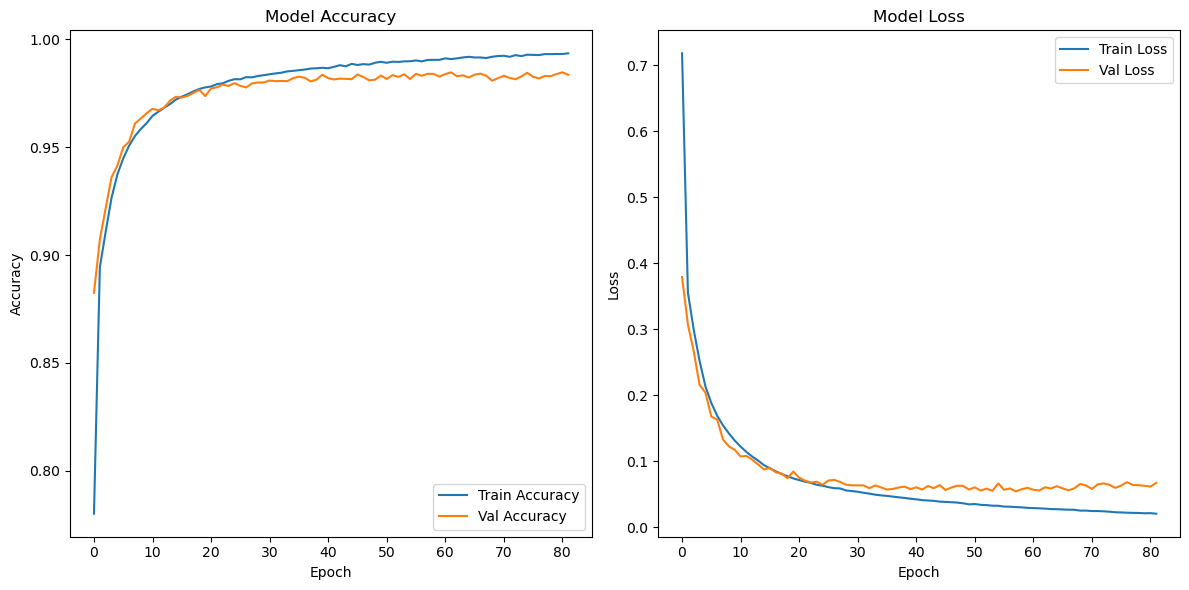

In [22]:
# Problem 2 - (f)

callback = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_accuracy', patience = 20,
)

# Model 1 선택
model_cb = Sequential([
    layers.Conv2D(32, kernel_size = (5, 5), strides = 1, activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Conv2D(64, kernel_size = (2, 2), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Flatten(),
    layers.Dense(num_classes, activation = 'softmax')
])

model_cb.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_cb = model_cb.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[callback],
    verbose=0,
)

plt.figure(figsize=(12, 6))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history_cb.history['accuracy'], label='Train Accuracy')
plt.plot(history_cb.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history_cb.history['loss'], label='Train Loss')
plt.plot(history_cb.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()